In [1]:
# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# READING THE DATASET

In [7]:
data=pd.read_csv('/content/housing.csv')
print(data.shape)

(20640, 10)


# New Section

In [8]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [9]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [10]:
# DESCRIBING THE DATASET

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# HISTOGRAM ANALYSIS OF THE DATASET

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

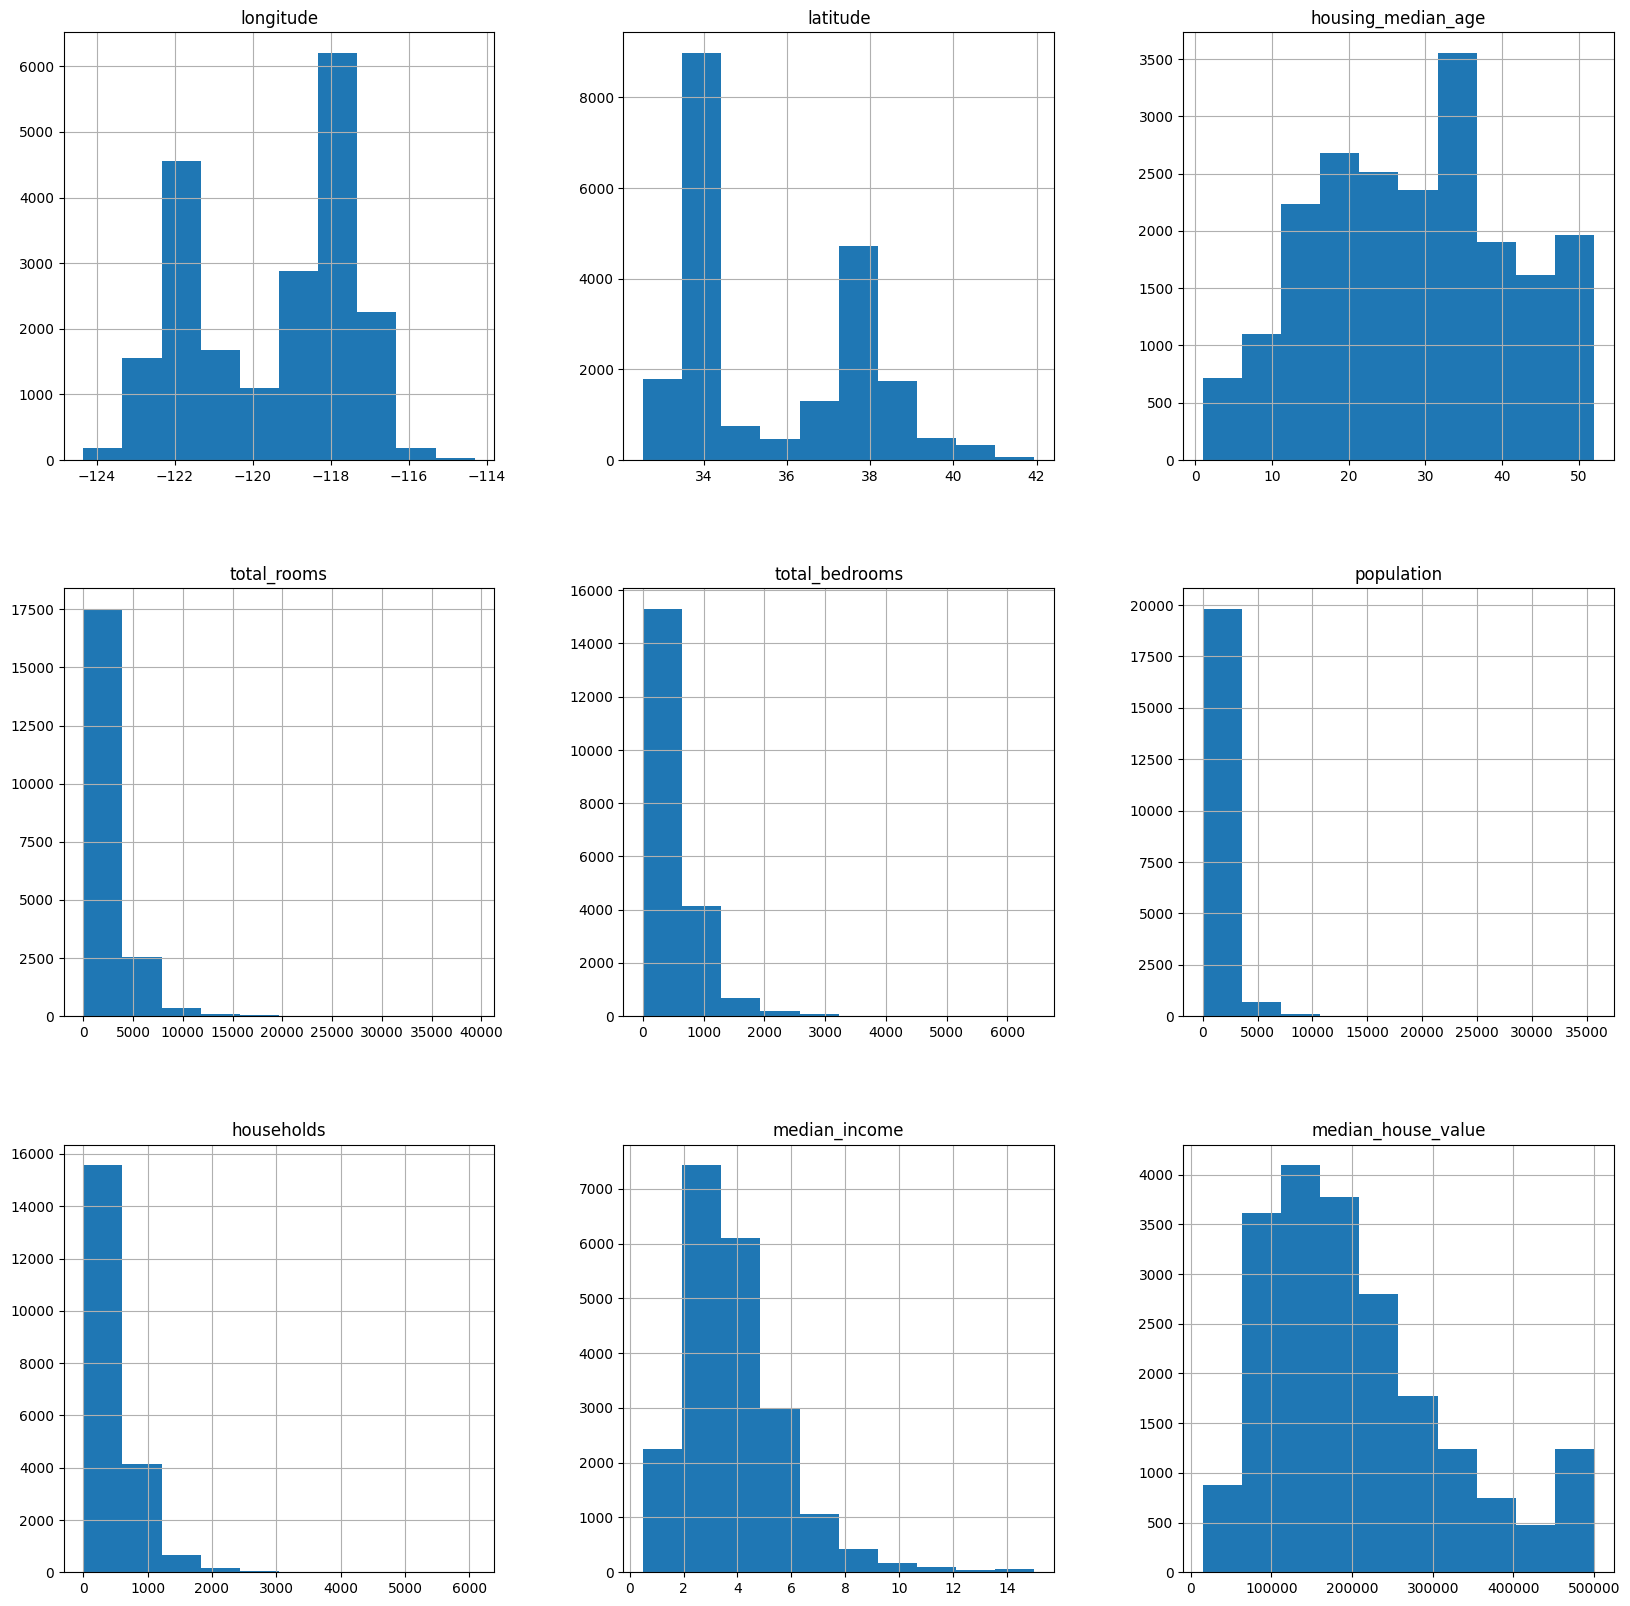

In [13]:
data.hist(figsize=(20,20),bins=10)

In [14]:
# FINDING MISSING VALUES

In [16]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [17]:
x=np.mean(data["total_bedrooms"])
x

537.8705525375618

In [18]:
# REPLACING MISSING VALUES WITH MEAN

In [19]:
data["total_bedrooms"].fillna(x, inplace = True)
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [20]:
# ENCODING CATEGORICAL DATA

In [21]:
lb = LabelEncoder()
data["ocean_proximity"] = lb.fit_transform(data["ocean_proximity"])

In [22]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


In [23]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,int64


In [24]:
# TRAINING AND TESTING

In [25]:
indep=data.drop(["median_house_value"],axis=1)
dep=data["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(indep,dep,test_size=0.2,random_state=45)
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (16512, 9)
X_test shape : (4128, 9)
y_train shape : (16512,)
y_test shape : (4128,)


In [26]:
# STANDARDIZATION

In [27]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
print(X_train[0:2,:])
print("test data")
print(X_test[0:2,:])

[[ 0.94382381 -0.70482757 -1.08618132  0.24075847 -0.10270202 -0.2500262
  -0.06837653  0.78049    -0.1177416 ]
 [-0.96871548  1.35954492  0.66045582  0.45958239  0.34745586  0.07736177
   0.41377702 -0.17980607 -0.1177416 ]]
test data
[[ 0.13985821 -0.05883346  0.42227803 -0.32408078 -0.37898939 -0.28970959
  -0.3880653  -0.76703862 -0.1177416 ]
 [ 0.71411936 -0.72355204  0.89863362 -0.32043371 -0.21226425 -0.04980546
  -0.13912733 -0.67748657 -0.82239883]]


In [28]:
# APPLYING MACHINE LEARNING ALOGRITHMS FOR REGRESSION

In [29]:
# LINEAR REGRESSION

In [30]:
lin = LinearRegression()
lin.fit(X_train, y_train)
print("INTERCEPT is :"+str(lin.intercept_))
print("COEFFICIENTS  are :"+str(lin.coef_))
predictions = lin.predict(X_test)
print("score:",lin.score(X_test,y_test))
print("LINEAR REGRESSION RMSE:",np.sqrt(mean_squared_error(y_test, predictions)))


INTERCEPT is :206599.51901647358
COEFFICIENTS  are :[-87063.80125707 -92753.75332404  14139.4847232  -13881.89944009
  35402.34791462 -51010.07556626  34169.709406    75060.63725863
   -451.28965357]
score: 0.6179205486274573
LINEAR REGRESSION RMSE: 71203.40213458188


In [31]:
# DECISION TREE

In [32]:
dtree_reg = DecisionTreeRegressor(max_depth=10)
dtree_reg.fit(X_train, y_train)
pred = dtree_reg.predict(X_test)
print("score:",dtree_reg.score(X_test,y_test))
print("DTREE RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

score: 0.7319849905134344
DTREE RMSE: 59635.30741005668


In [33]:
dtree_reg = DecisionTreeRegressor(max_depth=20,max_features = 'sqrt',min_samples_leaf = 2,min_samples_split = 3,random_state= 42)
dtree_reg.fit(X_train, y_train)
pred = dtree_reg.predict(X_test)
print("DTREE RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

DTREE RMSE: 69358.79069657781


In [34]:
# RANDOM FOREST

In [35]:
rt = RandomForestRegressor(max_depth = 20, min_samples_leaf = 50, max_features = 'sqrt',n_estimators = 1000)
rt.fit(X_train,y_train)
predf = rt.predict(X_test)
print("score:",rt.score(X_test,y_test))
print("RANDOM FOREST RMSE:",np.sqrt(mean_squared_error(y_test, predf)))

score: 0.758299704958419
RANDOM FOREST RMSE: 56632.07760636021


In [36]:
# LINEAR REGRESSION WITH ONE INDEPENDENT VARIABLE

In [37]:
col= ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
indep1=indep.drop(col,axis=1)
dep1=data["median_house_value"]
X_train1,X_test1,y_train1,y_test1 = train_test_split(indep1,dep1,test_size=0.2,random_state=45)
print("X_train1 shape :",X_train1.shape)
print("X_test1 shape :",X_test1.shape)
print("y_train1 shape :",y_train1.shape)
print("y_test1 shape :",y_test1.shape)

X_train1 shape : (16512, 1)
X_test1 shape : (4128, 1)
y_train1 shape : (16512,)
y_test1 shape : (4128,)


In [38]:
lin1 = LinearRegression()
lin1.fit(X_train1, y_train1)
pred2=lin1.predict(X_test1)
print("score:",lin1.score(X_test1,y_test1))
print("LINEAR REGRESSION RMSE 2:",np.sqrt(mean_squared_error(y_test1, pred2)))

score: 0.4858362493051306
LINEAR REGRESSION RMSE 2: 82598.96998640799


In [39]:
# PLOTTING

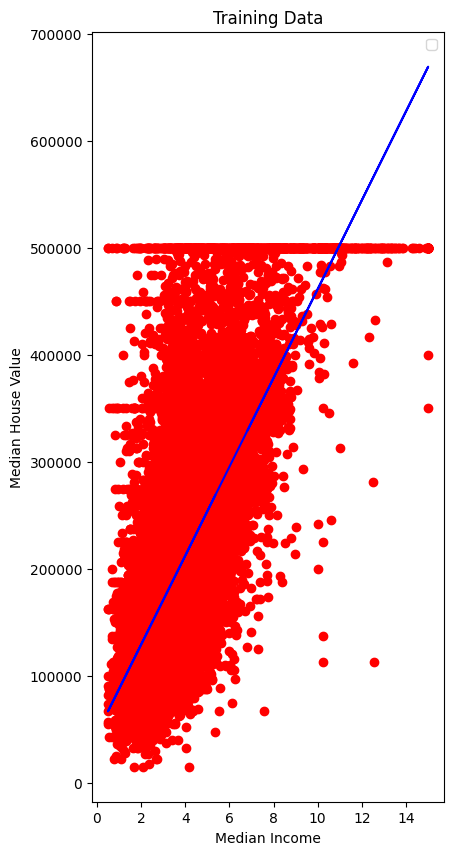

In [40]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train1,y_train1,color="red")
plt.plot(X_train1,lin1.predict(X_train1),color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

Text(0, 0.5, ' Predicted median_house_value')

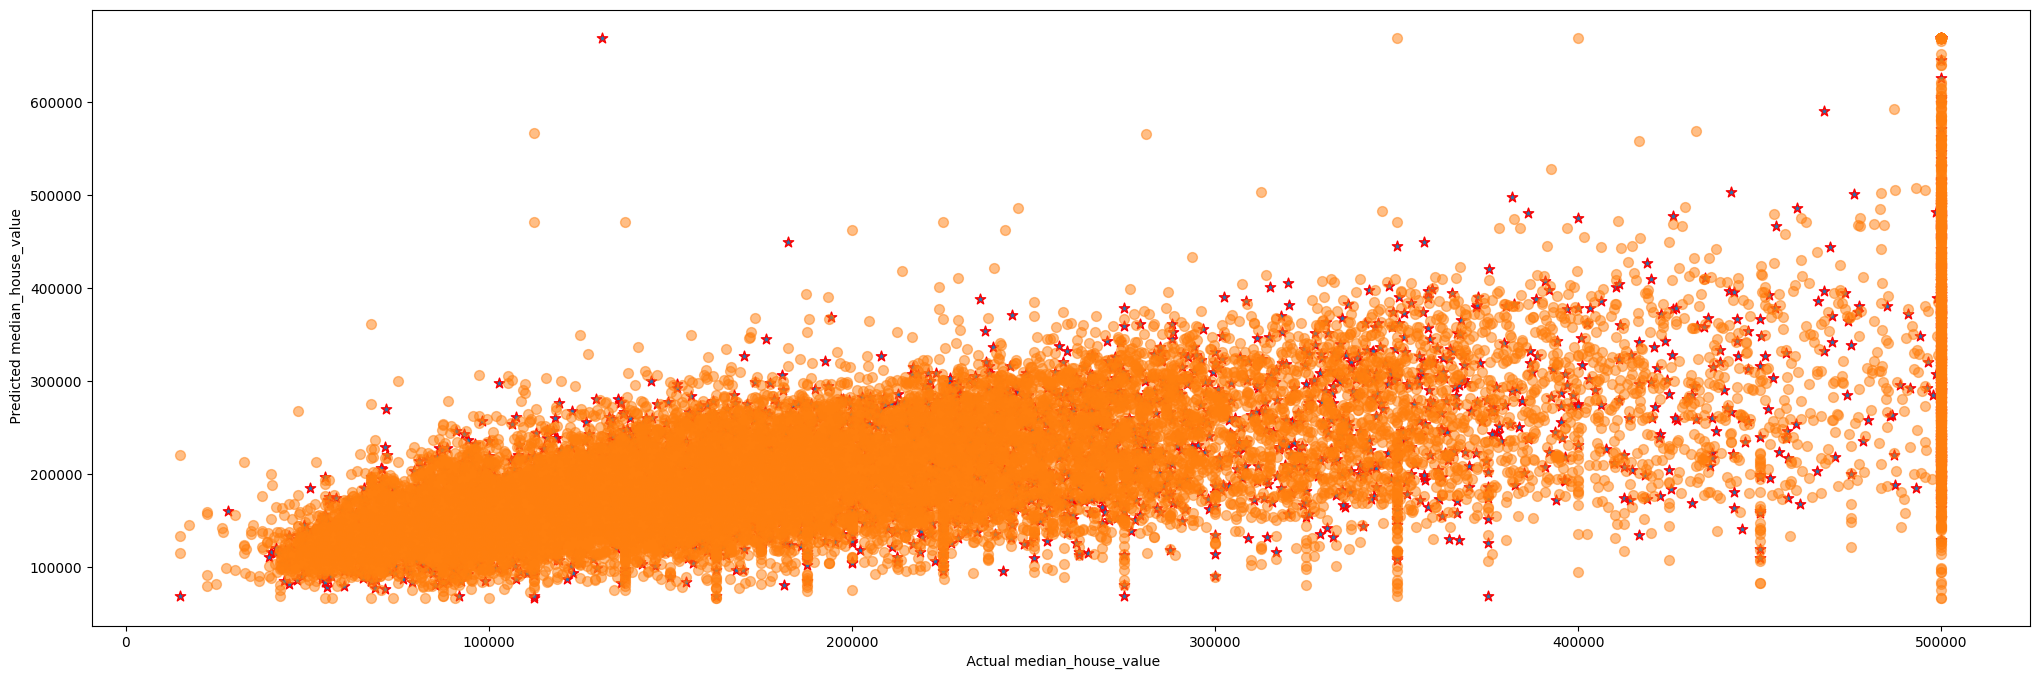

In [41]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test1,pred2,marker="*",edgecolors ="r",s=60)
plt.scatter(y_train1,lin1.predict(X_train1),marker="o",s=50,alpha=0.5)

plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")